# Enter your Details Here:

In [1]:
Num, Name, Week = input("Reg. Number:"), input("Name:"), input("Week:")

Reg. Number:23MCA1023
Name:Vivek Lele
Week:week_3


### 1.Import the libraries

In [2]:
import numpy as np
import pandas as pd


### 2. Import the dataset

In [3]:
x=np.array([1,2,3,4,5,6,7,8,9])
y=np.array([2,3,5,8,10,11,14,17,18])


### Printing the value of x

In [4]:
x

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

### Printng the value of y

In [5]:
y

array([ 2,  3,  5,  8, 10, 11, 14, 17, 18])

### *creating* the dataframe

In [6]:
df=pd.DataFrame(x,y);

In [7]:
df

,0
2,1
3,2
5,3
8,4
10,5
11,6
14,7
17,8
18,9


### Calculating the mean of x

In [8]:
x_mean=x.mean()
x_mean

5.0

### calculating the mean of y

In [9]:
y_mean=y.mean()
y_mean

9.777777777777779

### calculating x-*x̅*

In [10]:
x_minus_mean=x-x_mean
x_minus_mean

array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])

### calculating the y-Ȳ


In [11]:
y_minus_mean=y-y_mean
y_minus_mean

array([-7.77777778, -6.77777778, -4.77777778, -1.77777778,  0.22222222,
        1.22222222,  4.22222222,  7.22222222,  8.22222222])

### product of (x-x̅) * (y-Ȳ)


In [12]:
result=x_minus_mean * y_minus_mean
result_sum=result.sum();

In [13]:
x_minus_mean_square=x_minus_mean ** 2
sum_x_mean_square=x_minus_mean_square.sum();

### Calculating B1

In [14]:
B1=result_sum/sum_x_mean_square
B1

2.1166666666666667

### Calculating B0




In [15]:
B0=(y_mean)-(B1*x_mean)
B0

-0.8055555555555554

### calculating ŷ

In [16]:
y_cap=(2.12*x-0.81)
y_cap

array([ 1.31,  3.43,  5.55,  7.67,  9.79, 11.91, 14.03, 16.15, 18.27])

### calculating (y-ŷ)^2




In [17]:
y_minus_ycap=y-y_cap
y_minus_ycap
y_minus_ycap_square=y_minus_ycap ** 2;
y_minus_ycap_square

array([0.4761, 0.1849, 0.3025, 0.1089, 0.0441, 0.8281, 0.0009, 0.7225,
       0.0729])

In [18]:
y_minus_ycap_square=y_minus_ycap_square.sum()
y_minus_ycap_square

2.7408999999999986

### Calculating MSE

In [19]:
n=x.size
MSE=y_minus_ycap_square/n
MSE

0.3045444444444443

**GRADIENT DESCENT**

In [20]:
#defining the learning rate and number of iterations
alpha = 0.01
iterations = 5000

In [21]:
B0 = 0
B1 = 0

In [22]:
n = len(x)
n

9

### Calculating Gradient




In [23]:
# Gradient Descent
for _ in range(iterations):
    y_cap = B0 + B1 * x
    error = y_cap - y

    # Update coefficients
    B0 = B0 - alpha * (2/n) * np.sum(error)
    B1 = B1 - alpha * (2/n) * np.sum(error * x)


In [24]:
B0

-0.8055555542696224

In [25]:
B1

2.116666666462299

### MSE using Gradient Descent

In [26]:
# Calculate predictions using the obtained coefficients
y_cap_gradient_descent = B0 + B1 * x

# Calculate the residuals (difference between actual y and predicted y)
residuals = y - y_cap_gradient_descent

# Calculate Mean Squared Error (MSE)
mse = np.mean(residuals**2)

print("Mean Squared Error is ", mse)

Mean Squared Error is  0.30432098765432136


### a. LinearRegression Module:

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### Given toy dataset

In [28]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
y = np.array([2, 3, 5, 8, 10, 11, 14, 17, 18])

### split the dataset into test and train:

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


### create and fit the linear regression model

In [30]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

### Making prediction

In [31]:
# Make predictions on the test set
y_pred = linear_model.predict(x_test)


### MSE

In [32]:
mse_linear = mean_squared_error(y_test, y_pred)

In [33]:
print("Mean Squared Error (MSE) using Linear Regression:", mse_linear)


Mean Squared Error (MSE) using Linear Regression: 0.9438775510204135


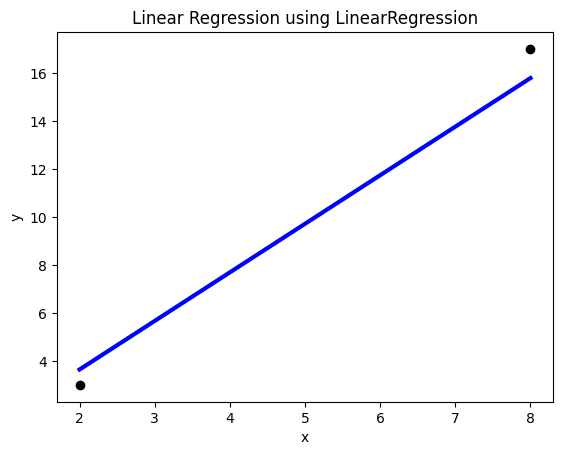

In [34]:
# Plot the regression line
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.title('Linear Regression using LinearRegression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### b. SGDRegressor Module:

In [35]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler


### Calculating using SGDRegressor

In [36]:
# Standardize the features (important for SGDRegressor)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create and fit the SGD Regressor model
sgd_model = SGDRegressor(max_iter=1000, random_state=42)
sgd_model.fit(x_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred_sgd = sgd_model.predict(x_test_scaled)

### MSE

In [37]:
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
print("Mean Squared Error (MSE) using SGD Regressor:", mse_sgd)

Mean Squared Error (MSE) using SGD Regressor: 1.4728190044380596


### Plotting the Linear Regression using SGDRegressor

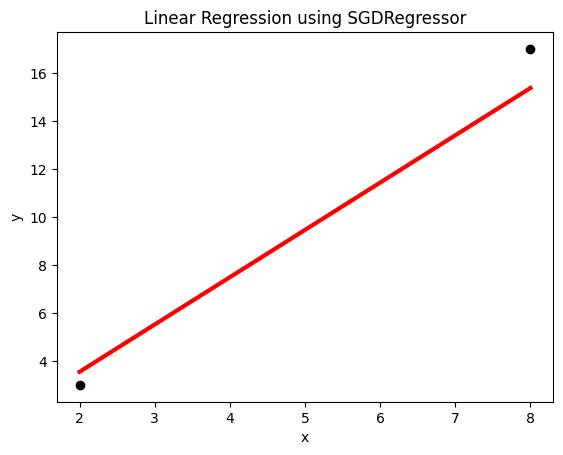

In [38]:
# Plot the regression line
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, y_pred_sgd, color='red', linewidth=3)
plt.title('Linear Regression using SGDRegressor')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 13. Write Down your inferences.

The code demonstrates linear regression through both the normal equation and gradient descent approaches.Additionally, scikit-learn's LinearRegression and SGDRegressor modules are employed for simple linear regression on a toy dataset, including visualizations and Mean Squared Error calculations for performance assessment.

# For uploading you need to execute the follwing script

In [39]:
from google.colab import auth
auth.authenticate_user()
import requests
gcloud_token = !gcloud auth print-access-token
gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
user = gcloud_tokeninfo['email']
import datetime
dt = datetime.datetime.now()
x = str(dt).split('.')[0]
print(f"This Script is executed by: ",user, "at", x)

This Script is executed by:  vivek.lele2023@vitstudent.ac.in at 2024-01-30 16:01:54
